# **RESALE FLAT PREDICTION**

This project is to predict resale price of HDB based on known category. Data is taken from Data.gov.sg

In [81]:
#Importing relevant Libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Data Collection

In [2]:
#Try to collect data from API
flat_url="https://data.gov.sg/api/action/datastore_search?resource_id=f1765b54-a209-4718-8d38-a39237f502b3"
response = requests.get(flat_url)
response.status_code

200

In [4]:
data=response.json()
data=pd.json_normalize(data)
data=data.loc[0,'result.records']
data=pd.json_normalize(data)
data

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block
0,ANG MO KIO,2 ROOM,Improved,44,ANG MO KIO AVE 10,232000,2017-01,61 years 04 months,1979,10 TO 12,1,406
1,ANG MO KIO,3 ROOM,New Generation,67,ANG MO KIO AVE 4,250000,2017-01,60 years 07 months,1978,01 TO 03,2,108
2,ANG MO KIO,3 ROOM,New Generation,67,ANG MO KIO AVE 5,262000,2017-01,62 years 05 months,1980,01 TO 03,3,602
3,ANG MO KIO,3 ROOM,New Generation,68,ANG MO KIO AVE 10,265000,2017-01,62 years 01 month,1980,04 TO 06,4,465
4,ANG MO KIO,3 ROOM,New Generation,67,ANG MO KIO AVE 5,265000,2017-01,62 years 05 months,1980,01 TO 03,5,601
...,...,...,...,...,...,...,...,...,...,...,...,...
95,BEDOK,4 ROOM,New Generation,91,BEDOK NTH RD,380000,2017-01,60 years 05 months,1978,01 TO 03,95,80
96,BEDOK,4 ROOM,New Generation,91,BEDOK NTH RD,382000,2017-01,60 years 07 months,1978,04 TO 06,96,78
97,BEDOK,4 ROOM,Simplified,84,BEDOK RESERVOIR RD,384000,2017-01,69 years 02 months,1987,07 TO 09,97,135
98,BEDOK,4 ROOM,Simplified,84,BEDOK RESERVOIR RD,385000,2017-01,69 years 03 months,1987,13 TO 15,98,148


In [5]:
#read data from local downloaded csv file
path = r"C:\Users\Handy Thong\Desktop\Personal Project\HDB Resale Price\Data\resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"
df = pd.read_csv(path)

In [6]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
146516,2023-02,YISHUN,5 ROOM,336C,YISHUN ST 31,07 TO 09,112.0,Improved,2015,91 years 11 months,630000.0
146517,2023-02,YISHUN,5 ROOM,513D,YISHUN ST 51,07 TO 09,120.0,3Gen,2018,94 years 02 months,738000.0
146518,2023-02,YISHUN,5 ROOM,504D,YISHUN ST 51,07 TO 09,113.0,Improved,2016,92 years 02 months,652000.0
146519,2023-02,YISHUN,5 ROOM,874,YISHUN ST 81,01 TO 03,127.0,Improved,1988,64 years 01 month,700000.0


## Data Wrangling

In [8]:
#Checking empty row
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [10]:
df['town'].value_counts()

SENGKANG           12366
PUNGGOL            10761
WOODLANDS          10176
YISHUN             10028
TAMPINES            9841
JURONG WEST         9726
BEDOK               7894
HOUGANG             7185
CHOA CHU KANG       6729
ANG MO KIO          6130
BUKIT MERAH         5631
BUKIT PANJANG       5621
BUKIT BATOK         4905
TOA PAYOH           4686
PASIR RIS           4535
KALLANG/WHAMPOA     4399
QUEENSTOWN          4171
GEYLANG             3635
SEMBAWANG           3620
CLEMENTI            3357
JURONG EAST         3050
BISHAN              2792
SERANGOON           2742
CENTRAL AREA        1217
MARINE PARADE        940
BUKIT TIMAH          384
Name: town, dtype: int64

In [11]:
df['flat_type'].value_counts()

4 ROOM              61190
5 ROOM              37131
3 ROOM              34422
EXECUTIVE           11388
2 ROOM               2260
MULTI-GENERATION       72
1 ROOM                 58
Name: flat_type, dtype: int64

In [12]:
df['storey_range'].value_counts()

04 TO 06    33745
07 TO 09    30700
10 TO 12    27299
01 TO 03    25929
13 TO 15    14025
16 TO 18     6598
19 TO 21     2804
22 TO 24     2046
25 TO 27     1214
28 TO 30      771
31 TO 33      406
34 TO 36      383
37 TO 39      340
40 TO 42      166
43 TO 45       48
46 TO 48       34
49 TO 51       13
Name: storey_range, dtype: int64

In [14]:
df['flat_model'].value_counts()

Model A                   49061
Improved                  36529
New Generation            18504
Premium Apartment         16907
Simplified                 5731
Apartment                  5727
Maisonette                 4325
Standard                   4125
DBSS                       2653
Model A2                   1688
Model A-Maisonette          270
Adjoined flat               262
Type S1                     261
Type S2                     148
Premium Apartment Loft       90
Terrace                      87
Multi Generation             72
2-room                       40
Improved-Maisonette          20
Premium Maisonette           14
3Gen                          7
Name: flat_model, dtype: int64

## Exploratory Data Analysis with Visualization

In [19]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


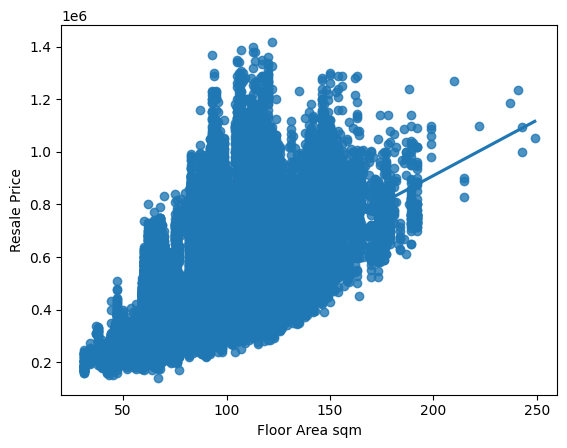

In [21]:
sns.regplot(data=df, x='floor_area_sqm', y='resale_price')
plt.xlabel('Floor Area sqm')
plt.ylabel('Resale Price')
plt.show()

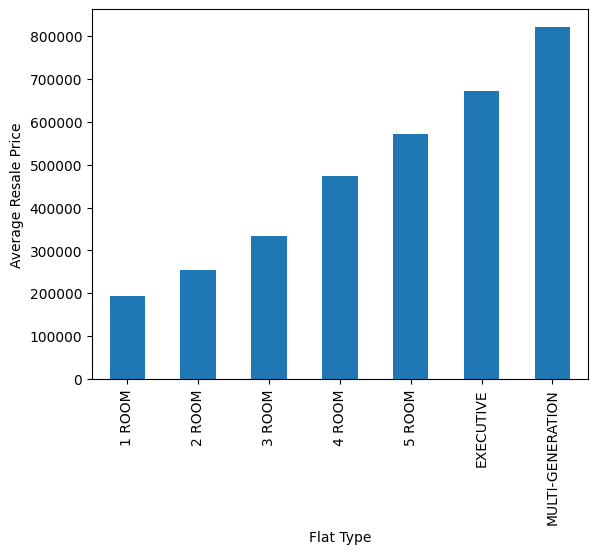

In [53]:
df_type = df[['flat_type','resale_price']].groupby('flat_type').mean()
df_type.plot(kind='bar', legend=None)
plt.xlabel('Flat Type')
plt.ylabel('Average Resale Price')
plt.show()

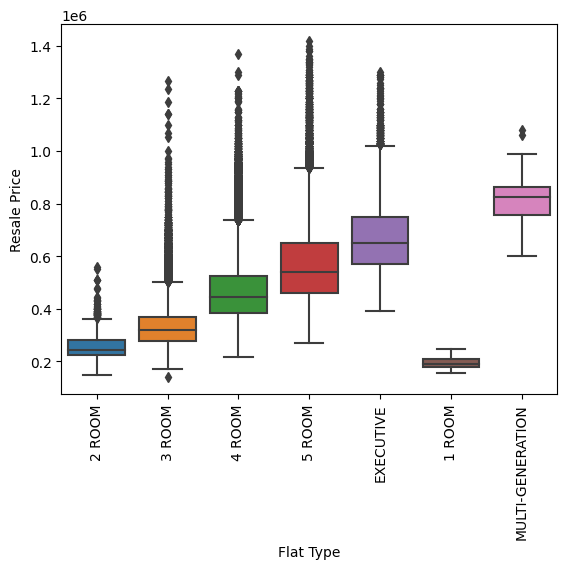

In [31]:
sns.boxplot(data=df, x='flat_type', y='resale_price')
plt.xticks(rotation=90)
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')
plt.show()

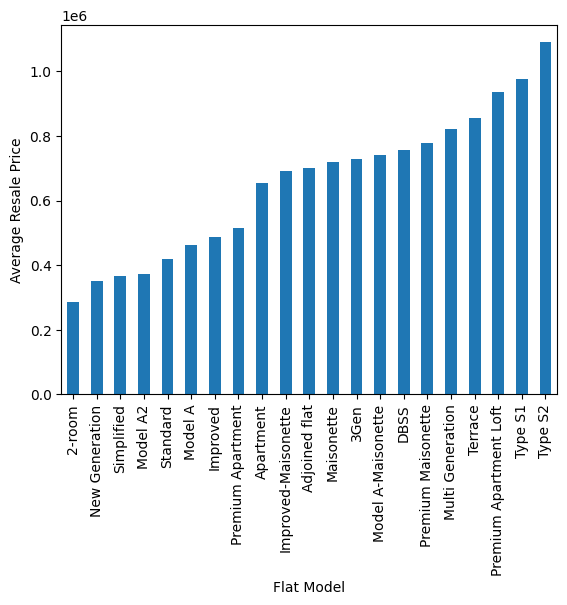

In [58]:
df_model = df[['flat_model','resale_price']].groupby('flat_model').mean().sort_values(by='resale_price')
df_model.plot(kind='bar', legend=None)
plt.xlabel('Flat Model')
plt.ylabel('Average Resale Price')
plt.show()

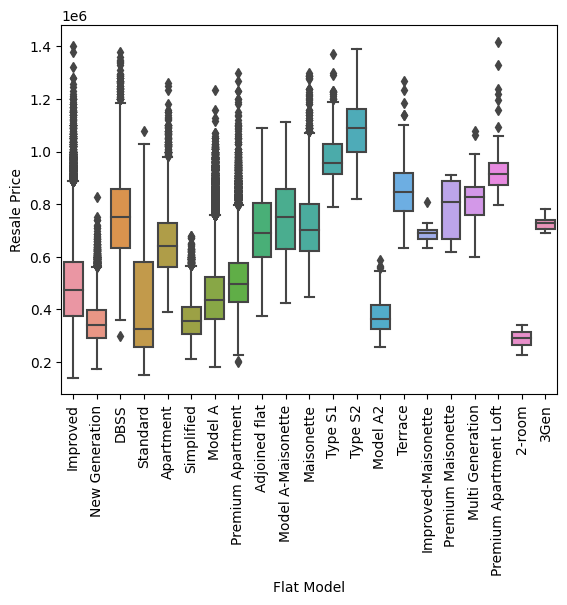

In [49]:
sns.boxplot(data=df, x='flat_model', y='resale_price')
plt.xticks(rotation=90)
plt.xlabel('Flat Model')
plt.ylabel('Resale Price')
plt.show()

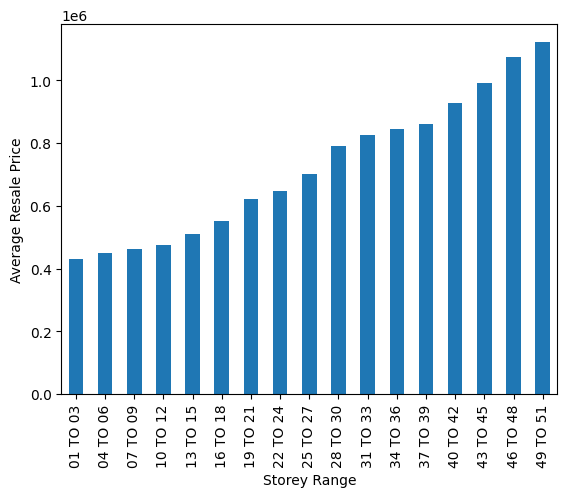

In [57]:
df_storey = df[['storey_range','resale_price']].groupby('storey_range').mean().sort_values(by='resale_price')
df_storey.plot(kind='bar', legend=None)
plt.xlabel('Storey Range')
plt.ylabel('Average Resale Price')
plt.show()

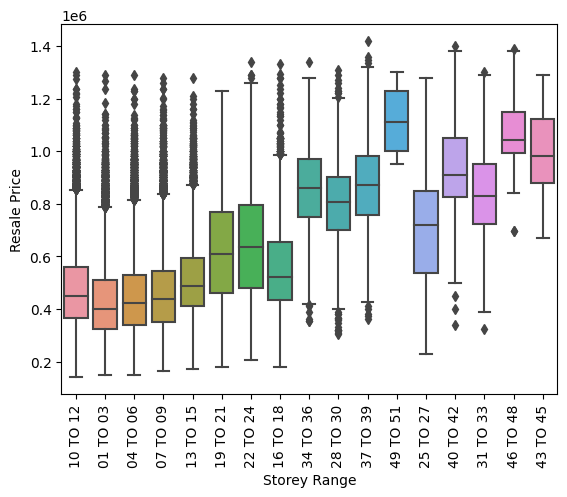

In [56]:
sns.boxplot(data=df, x='storey_range', y='resale_price')
plt.xticks(rotation=90)
plt.xlabel('Storey Range')
plt.ylabel('Resale Price')
plt.show()

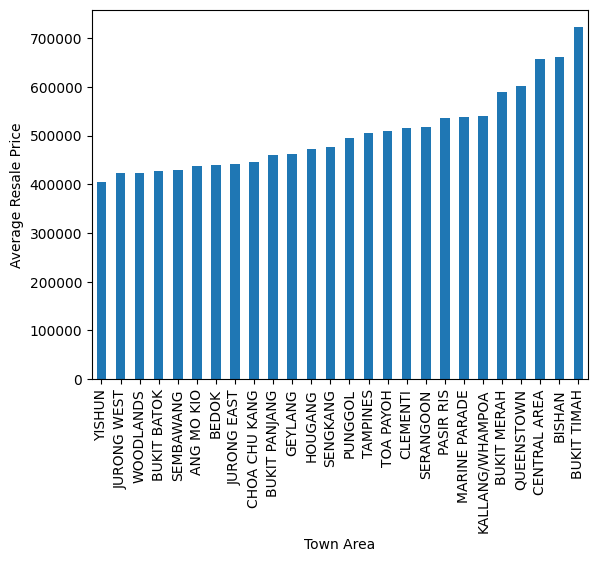

In [59]:
df_town = df[['town','resale_price']].groupby('town').mean().sort_values(by='resale_price')
df_town.plot(kind='bar', legend=None)
plt.xlabel('Town Area')
plt.ylabel('Average Resale Price')
plt.show()

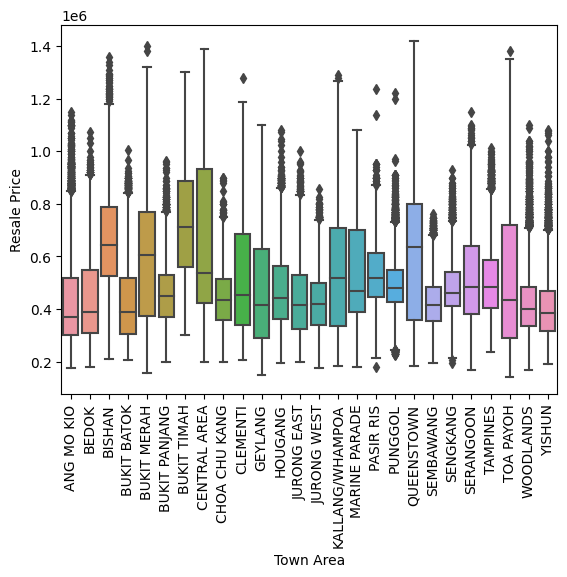

In [30]:
sns.boxplot(data=df, x='town', y='resale_price')
plt.xticks(rotation=90)
plt.xlabel('Town Area')
plt.ylabel('Resale Price')
plt.show()

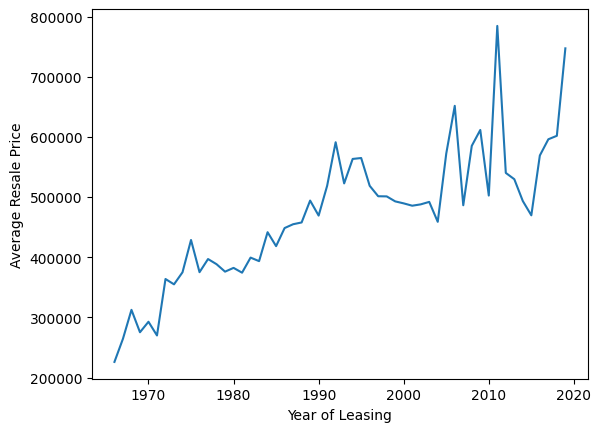

In [61]:
df_year = df[['lease_commence_date','resale_price']].groupby('lease_commence_date').mean()
df_year.plot(kind='line', legend=None)
plt.xlabel('Year of Leasing')
plt.ylabel('Average Resale Price')
plt.show()

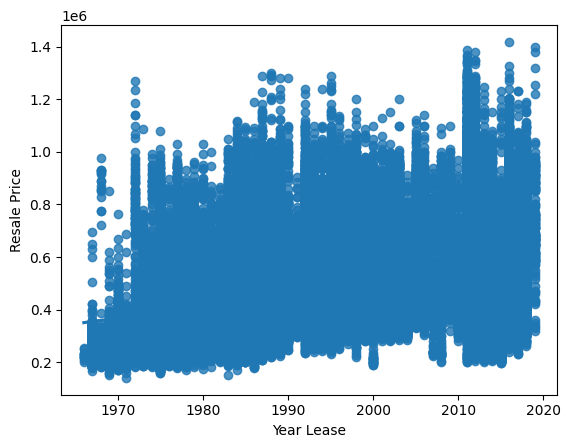

In [60]:
sns.regplot(data=df, x='lease_commence_date', y='resale_price')
plt.xlabel('Year Lease')
plt.ylabel('Resale Price')
plt.show()

Splitting data into independent and dependent variable, restructuring the dependent variable data and getting dummies variable for discrete independent variable

In [67]:
feature = ['town', 'flat_type', 'flat_model', 'storey_range', 'floor_area_sqm', 'lease_commence_date']
df_feature = df[feature]
df_feature.head()

,town,flat_type,flat_model,storey_range,floor_area_sqm,lease_commence_date
0,ANG MO KIO,2 ROOM,Improved,10 TO 12,44.0,1979
1,ANG MO KIO,3 ROOM,New Generation,01 TO 03,67.0,1978
2,ANG MO KIO,3 ROOM,New Generation,01 TO 03,67.0,1980
3,ANG MO KIO,3 ROOM,New Generation,04 TO 06,68.0,1980
4,ANG MO KIO,3 ROOM,New Generation,01 TO 03,67.0,1980


In [17]:
y = df['resale_price']
y

0          232000.0
1          250000.0
2          262000.0
3          265000.0
4          265000.0
            ...    
146516     630000.0
146517     738000.0
146518     652000.0
146519     700000.0
146520    1068000.0
Name: resale_price, Length: 146521, dtype: float64

In [71]:
x = pd.get_dummies(df_feature, columns=['town', 'flat_type', 'flat_model', 'storey_range'])
x = x.astype(float)
x.head()

,floor_area_sqm,lease_commence_date,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,...,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_34 TO 36,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51
0,44.0,1979.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,67.0,1978.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67.0,1980.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,68.0,1980.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,67.0,1980.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Normalizing independent variable data

In [72]:
x = preprocessing.StandardScaler().fit_transform(x)
x

array([[-2.22594536, -1.20291509,  4.78563307, ..., -0.01810264,
        -0.01523491, -0.00941979],
       [-1.2709909 , -1.27576785,  4.78563307, ..., -0.01810264,
        -0.01523491, -0.00941979],
       [-1.2709909 , -1.13006233,  4.78563307, ..., -0.01810264,
        -0.01523491, -0.00941979],
       ...,
       [ 0.63891803,  1.49263709, -0.20895877, ..., -0.01810264,
        -0.01523491, -0.00941979],
       [ 1.22019466, -0.54724024, -0.20895877, ..., -0.01810264,
        -0.01523491, -0.00941979],
       [ 3.46226166, -0.25582919, -0.20895877, ..., -0.01810264,
        -0.01523491, -0.00941979]])

## Predictive analysis using Regression

Starting with splitting data into different test and train sets

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 29305
number of training samples: 117216


In [84]:
LinReg = LinearRegression()
LinReg.fit(x_train,y_train)

LinearRegression()

In [85]:
yhat = LinReg.predict(x_test)
yhat[0:5]

array([345410.42717723, 250922.42717723, 392922.42717723, 303978.42717723,
       183530.42717723])

In [86]:
print('Mean absolute error =', mean_absolute_error(y_test, yhat))
print('Residual sum of squares (MSE) =', mean_squared_error(y_test, yhat))
print('R2-score =', r2_score(y_test, yhat))

Mean absolute error = 55688.83717840977
Residual sum of squares (MSE) = 4919163578.030567
R2-score = 0.820426137803166
